In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings('ignore')

In [119]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter07/Dataset/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- **`Features`**
    - **`cp`**: Chest Pain
    - **`trestbps`**: Resting blood pressure in mm Hg on admission to the hospital
    - **`chol`**: Serum cholesterol in mg/dl.
    - **`fbs`**: Fasting blood sugar - it's greater than 120 mg/dl or not
    - **`restecg`**: Resting ECG results
    - **`thatach`**: Maximum recorded heart rate 
    - **`exang`**: Presence of exercise-induced angina
    - **`oldpeak`**: ST depression induced by exercise relative to rest
    - **`slope`**: The slope of the peak exercise ST segment
    - **`ca`**: Number of major vessels colored by fluoroscopy.
    - **`thal`**: Thalassemia

In [120]:
heart_df.shape

(303, 14)

In [121]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [122]:
heart_df.isna().sum().sum()

0

## Data Preprocessing

In [123]:
print('SEX', heart_df.sex.unique())
print("CP", heart_df.cp.unique())
print('FBS', heart_df.fbs.unique())
print('RESTECG', heart_df.restecg.unique())
print('EXANG', heart_df.exang.unique())
print('SLOPE', heart_df.slope.unique())
print('CA', heart_df.ca.unique())
print('TARGET', heart_df.target.unique())

SEX [1 0]
CP [3 2 1 0]
FBS [1 0]
RESTECG [0 1 2]
EXANG [0 1]
SLOPE [0 2 1]
CA [0 2 1 3 4]
TARGET [1 0]


In [124]:
preprocessed_df = heart_df.copy()

In [125]:
## Categorical data mapping

sex_map = {0:'Female', 1:'Male'}
cp_map = {0:'Typical angina', 1:'Atypical agngina',2:'Non-anginal pain', 3:'Asymptomatic'}
restecg_map = {0:'Normal', 1:'ST-T wave abnormality', 2:'Left ventricular hypertrophy'}
slope_map = {0:'Upsloping', 1:'Flat', 2:'Downsloping'}
yes_no_map = {0:'No', 1:'Yes'}


preprocessed_df.sex = preprocessed_df.sex.map(sex_map)
preprocessed_df.cp = preprocessed_df.cp.map(cp_map)
preprocessed_df.fbs = preprocessed_df.fbs.map(yes_no_map)
preprocessed_df.restecg = preprocessed_df.restecg.map(restecg_map)
preprocessed_df.exang = preprocessed_df.exang.map(yes_no_map)
preprocessed_df.slope = preprocessed_df.slope.map(slope_map)
preprocessed_df.target = preprocessed_df.target.map(yes_no_map)

In [126]:
# feature renaming

column_map = {'cp' : 'chest_pain', 
              'trestbps' : 'rest_bp', 
              'fbs' : 'fast_bld_sugar', 
              'restecg' : 'rest_ecg', 
              'thalach' : 'max_hr', 
              'exang' : 'ex_angina', 
              'oldpeak' : 'st_depr', 
              'ca' : 'colored_vessels', 
              'thal' : 'thalassemia'}

preprocessed_df.rename(columns=column_map, inplace = True)
heart_df.rename(columns=column_map, inplace=True)

In [127]:
preprocessed_df.head()

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
0,63,Male,Asymptomatic,145,233,Yes,Normal,150,No,2.3,Upsloping,0,1,Yes
1,37,Male,Non-anginal pain,130,250,No,ST-T wave abnormality,187,No,3.5,Upsloping,0,2,Yes
2,41,Female,Atypical agngina,130,204,No,Normal,172,No,1.4,Downsloping,0,2,Yes
3,56,Male,Atypical agngina,120,236,No,ST-T wave abnormality,178,No,0.8,Downsloping,0,2,Yes
4,57,Female,Typical angina,120,354,No,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,2,Yes


In [128]:
preprocessed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depr,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
colored_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thalassemia,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [129]:
preprocessed_df.describe(include='O').T

,count,unique,top,freq
sex,303,2,Male,207
chest_pain,303,4,Typical angina,143
fast_bld_sugar,303,2,No,258
rest_ecg,303,3,ST-T wave abnormality,152
ex_angina,303,2,No,204
slope,303,3,Downsloping,142
target,303,2,Yes,165


## Univariate Analysis

In [130]:
## plot box-plots to check outliers

def plot_boxplot(df, col, offset=10):
    g = sns.boxplot(df[col], color='bisque', linewidth=2)

    for line in g.get_lines()[:5]:
        for x in line.get_xdata():
            plt.annotate(f"{x}",(x,0), 
                         xytext=(x+offset, y-0.3), 
                         arrowprops={'width':0.2}, 
                         **{'color':'red', 'size':14})

    plt.show()

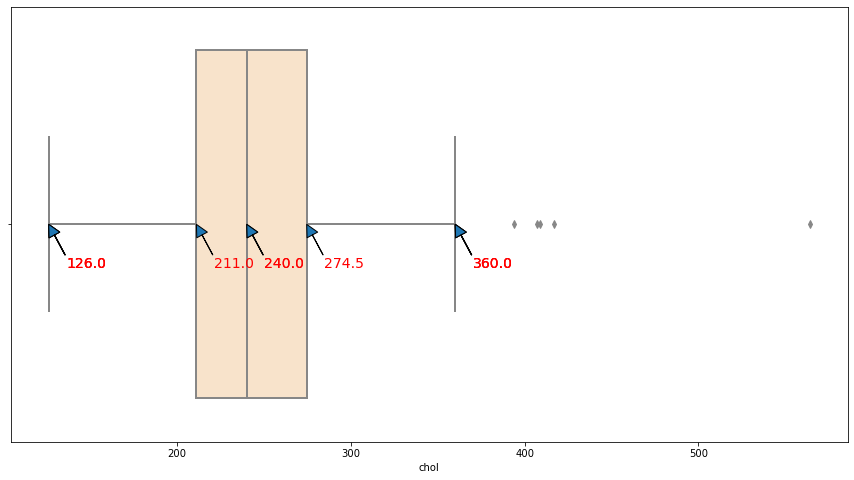

In [131]:
plot_boxplot(preprocessed_df, 'chol')

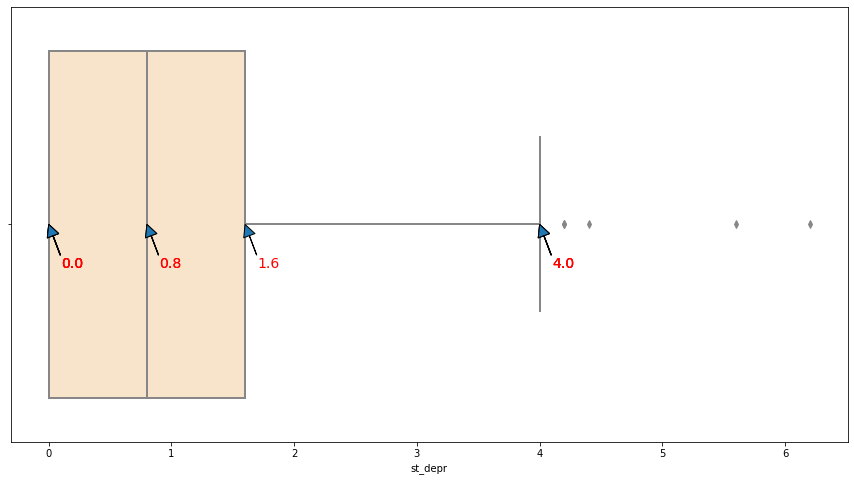

In [132]:
plot_boxplot(preprocessed_df, 'st_depr', offset=0.1)

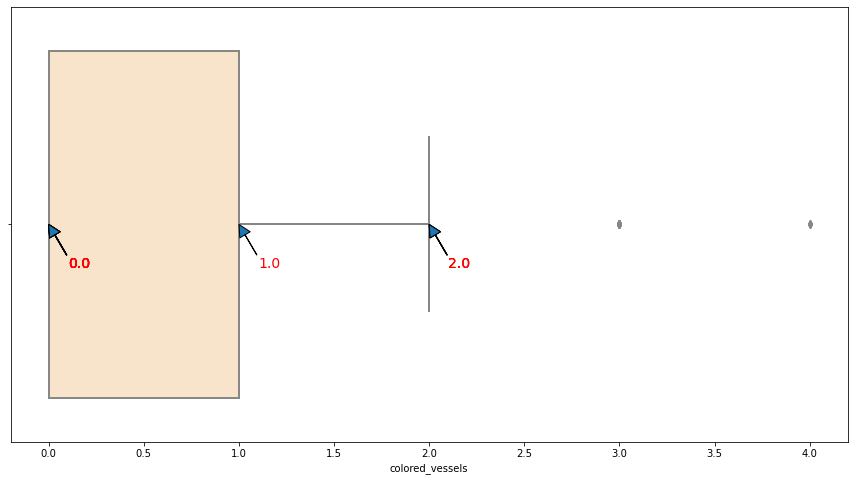

In [133]:
plot_boxplot(preprocessed_df, 'colored_vessels', offset=0.1)

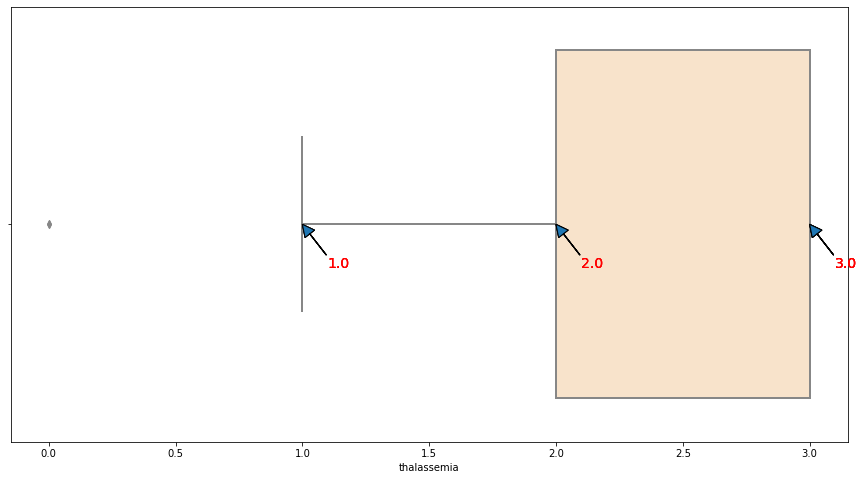

In [134]:
plot_boxplot(preprocessed_df, 'thalassemia', offset=0.1)

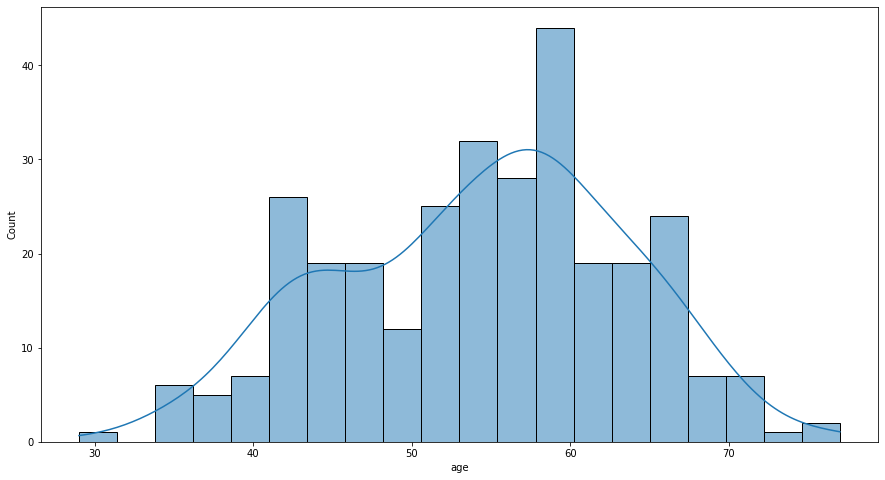

In [135]:
sns.histplot(data=preprocessed_df, x='age', kde=True, bins=20)
plt.show()

In [152]:
def plot_barchart(df, col, hue=None, is_pct=False):
    if is_pct:
        g = df[col].value_counts(normalize=True)*100
        g = g.plot.bar(rot=0, color='darkorange')
#         plt.title(f"Percentage share of each category in feature {col}", 
#                   fontdict={'color':'tomato', 'size':16})
    else:
        g = sns.countplot(data=df, x=col, hue=hue)
#         plt.title(f"Total number of each category feature {col}", 
#                   fontdict={'color':'tomato', 'size':16})
    for rect in g.patches:
        x = rect.get_x()
        y = rect.get_y()
        h = rect.get_height()
        w = rect.get_width()
        g.annotate(f"{h}" if not is_pct else f"{h:.2f}%", (x+w/2, h), ha='center', va='bottom', **{'size':14})
        
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)

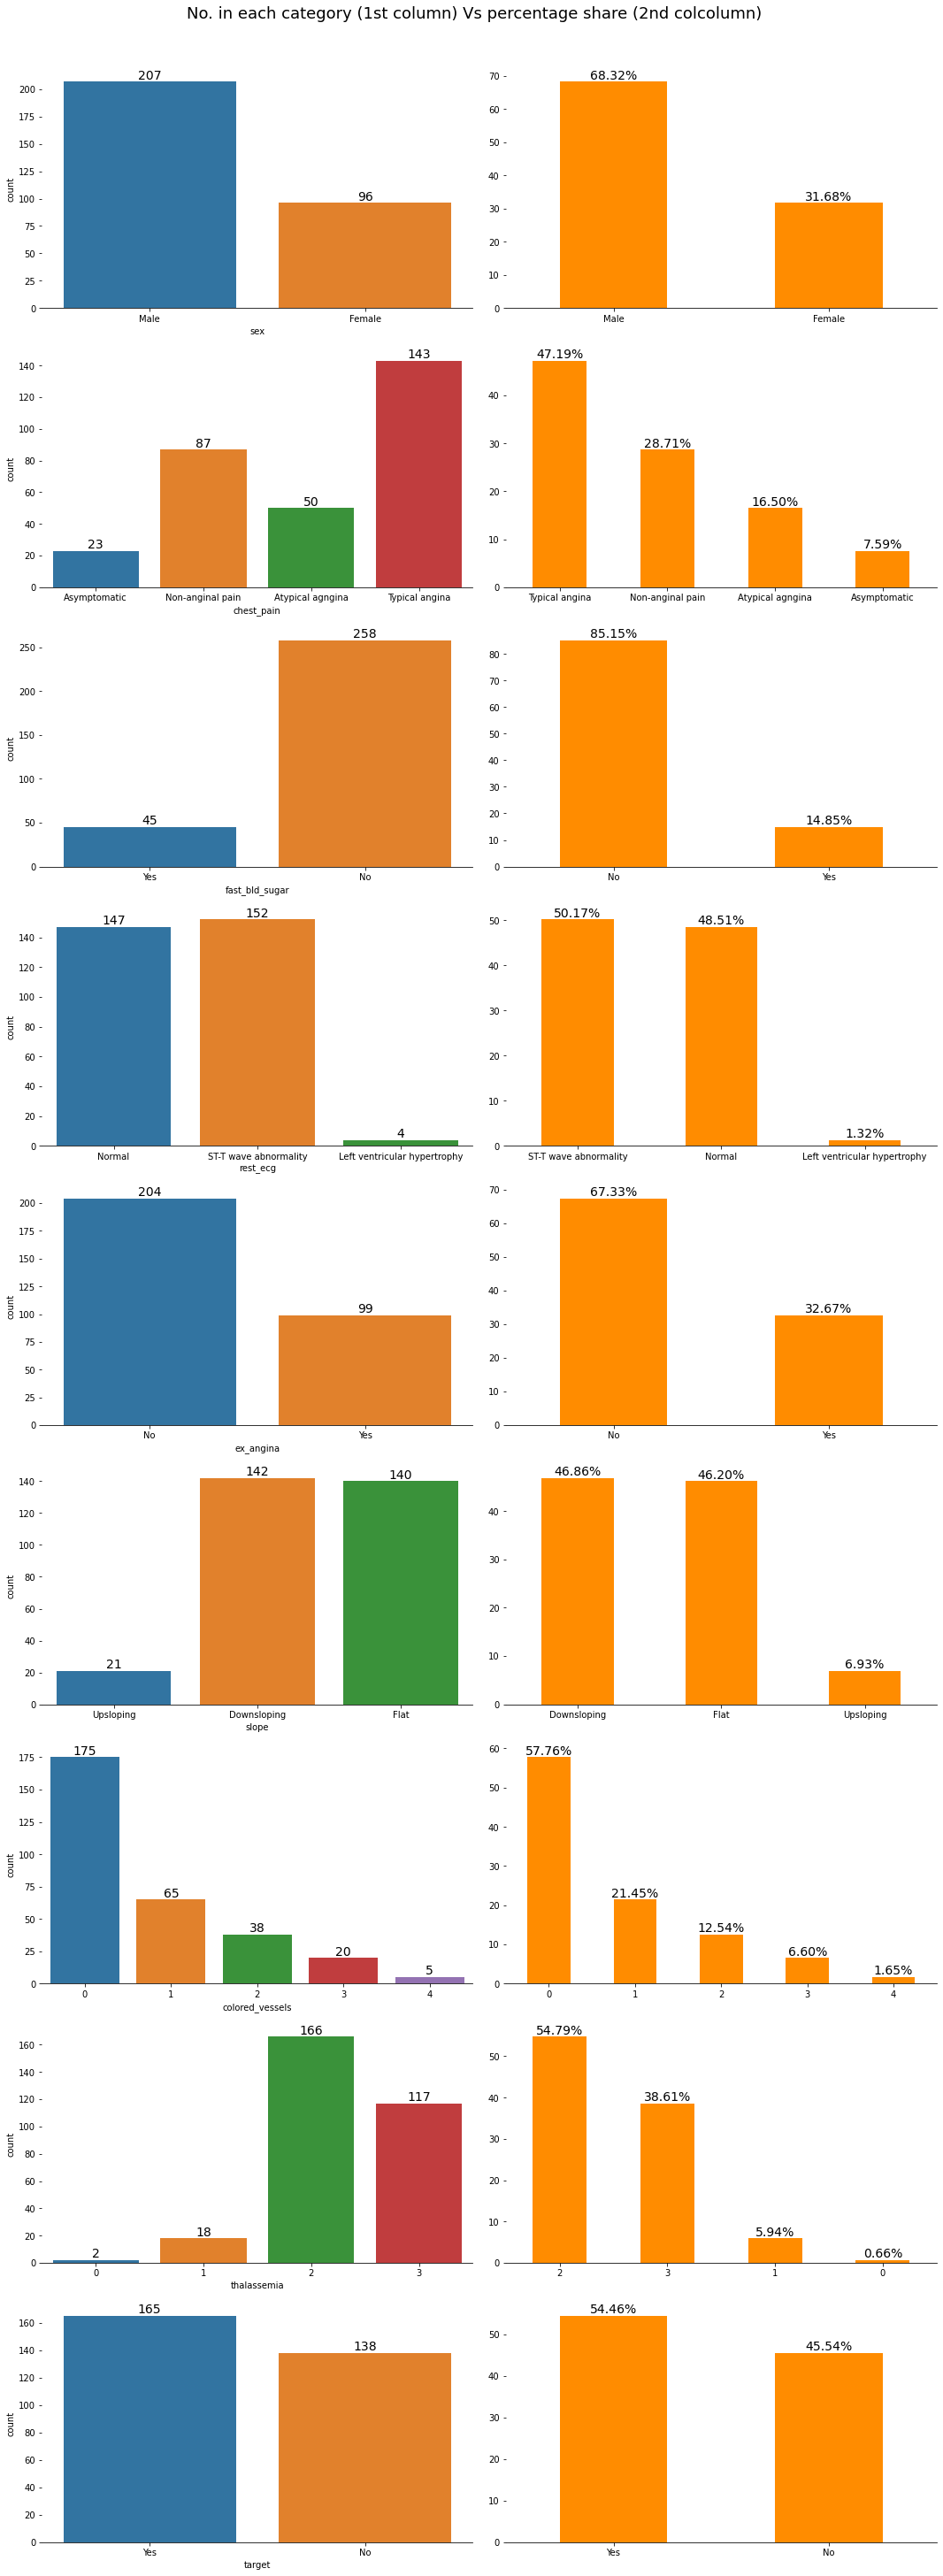

In [151]:
categorical_features = ['sex', 'chest_pain', 'fast_bld_sugar',
                        'rest_ecg', 'ex_angina', 'slope', 
                        'colored_vessels', 'thalassemia', 'target']

fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(15, 40))
axs = np.ravel(axs)

j = 0
for i, col in enumerate(categorical_features):
    plt.sca(axs[i+j])
    plot_barchart(preprocessed_df, col, is_pct=False)
    j+=1
    plt.sca(axs[i+j])
    plot_barchart(preprocessed_df, col, is_pct=True)
    
plt.suptitle("No. in each category (1st column) Vs percentage share (2nd colcolumn)", y=1.01,
             fontsize=18, ha='center', va='top')
plt.tight_layout()
plt.show()

## Bivariate Analysis

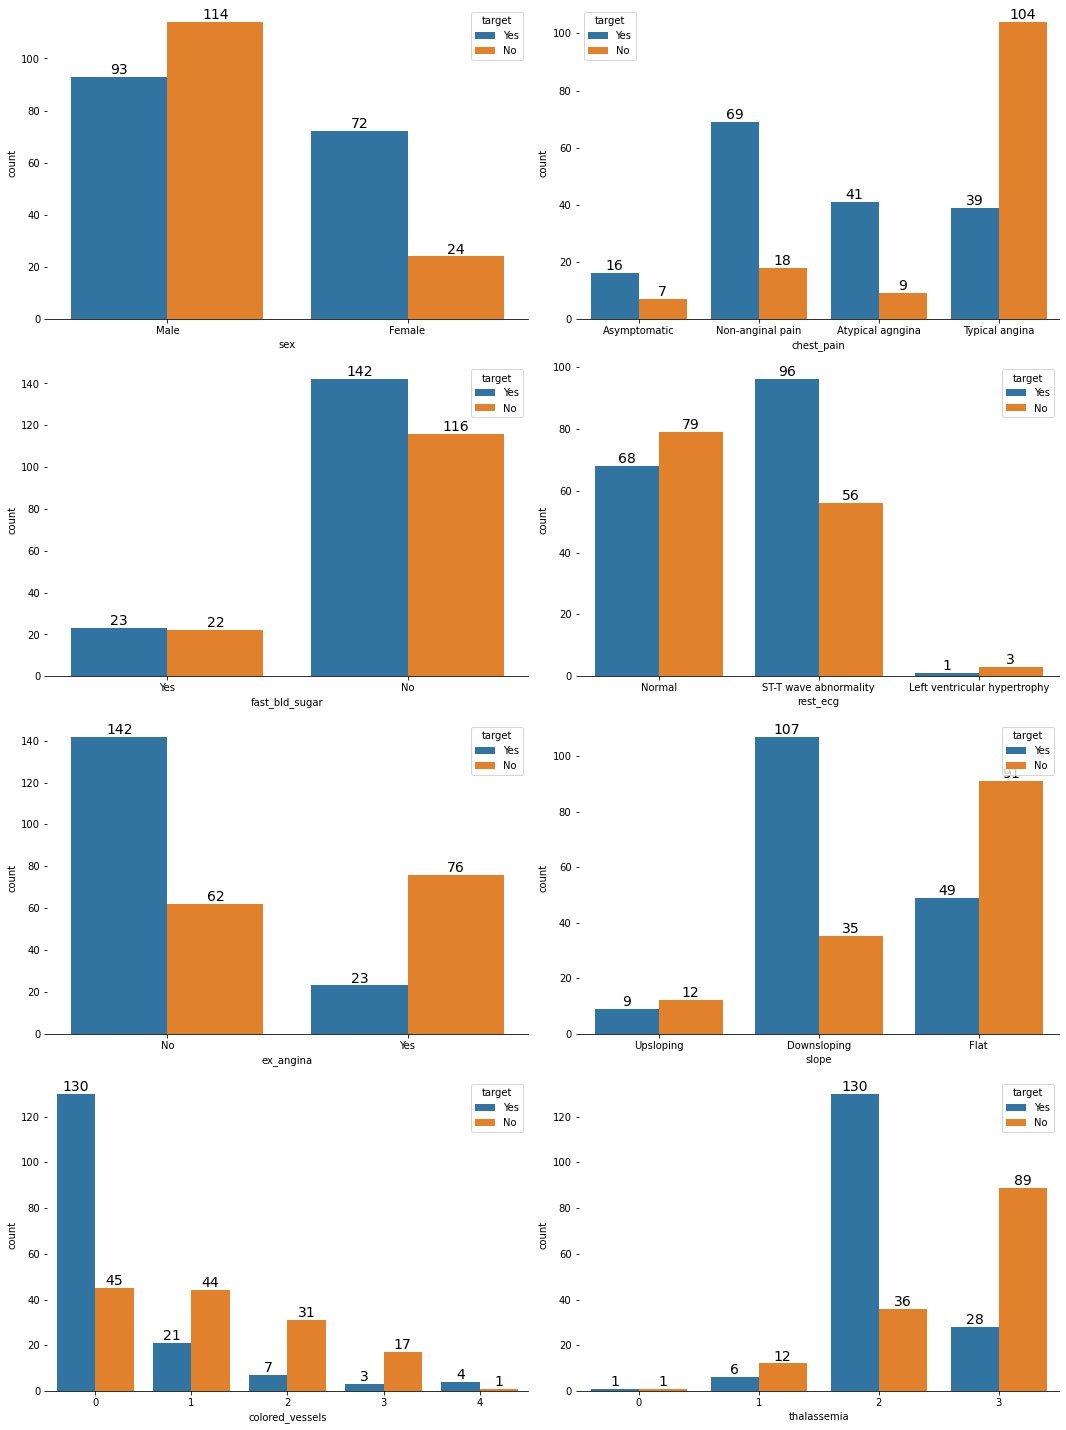

In [154]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axs = np.ravel(axs)

for i, col in enumerate(categorical_features[:-1]):
    plt.sca(axs[i])
    plot_barchart(preprocessed_df, col, hue='target', is_pct=False)
    
plt.tight_layout()
plt.show()

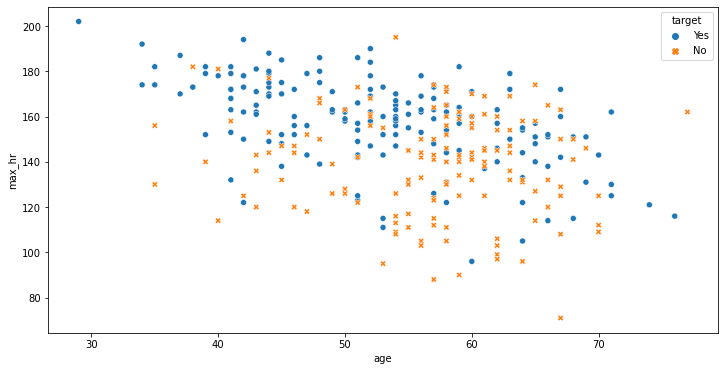

In [25]:
sns.scatterplot(data=preprocessed_df, x='age', y='max_hr', style='target', hue='target')
plt.show()

In [155]:
heart_df['age_category'] = pd.cut(heart_df.age, bins = list(np.arange(25, 85, 5)))
preprocessed_df['age_category'] = pd.cut(preprocessed_df.age, bins = list(np.arange(25, 85, 5)))

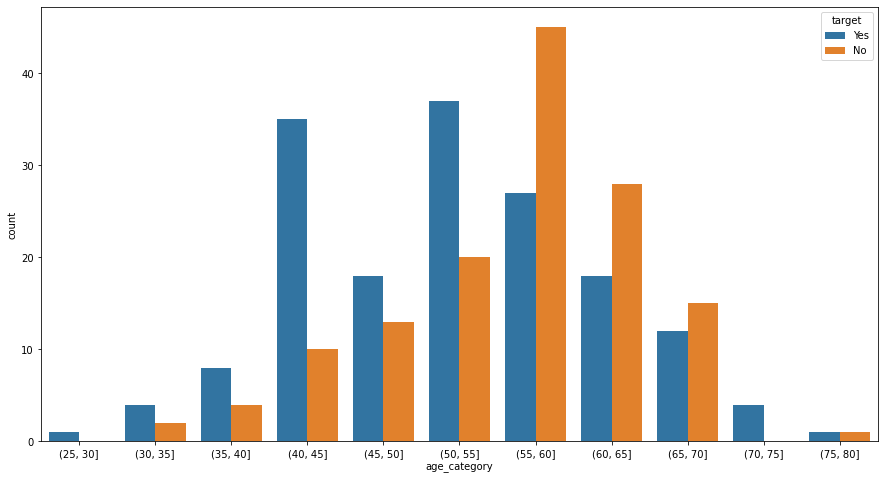

In [156]:
sns.countplot(data=preprocessed_df, x='age_category', hue='target')
plt.show()

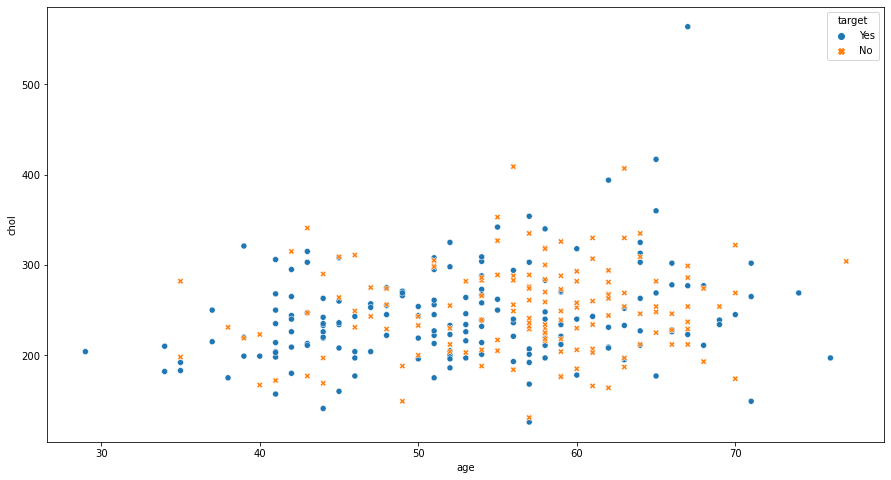

In [157]:
### presence of heart disease and cholestrol

sns.scatterplot(data=preprocessed_df, x='age', y='chol', style='target', hue='target')
plt.show()

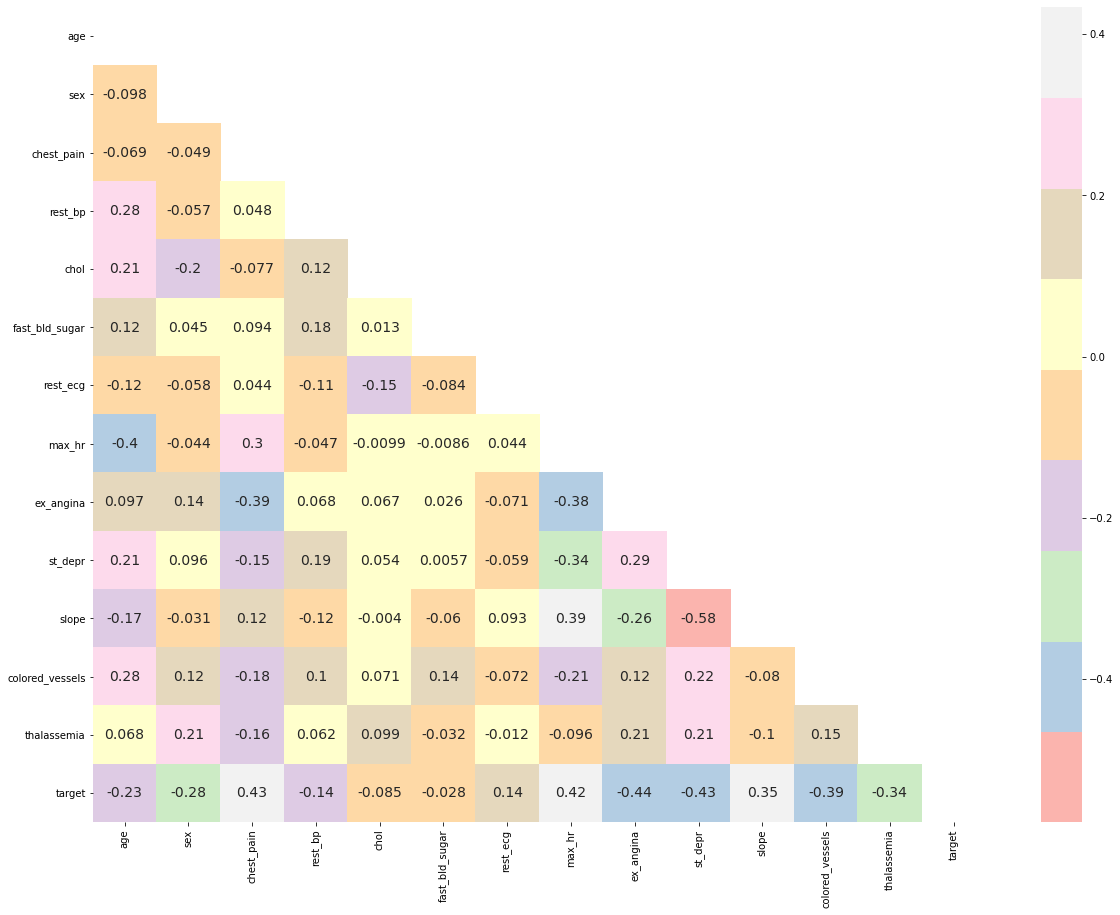

In [158]:
corr_matrix_pearson = heart_df.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix_pearson, cmap='Pastel1', annot=True, 
            annot_kws={'size':14}, fmt='.2g', 
            mask=np.triu(corr_matrix_pearson))
plt.show()

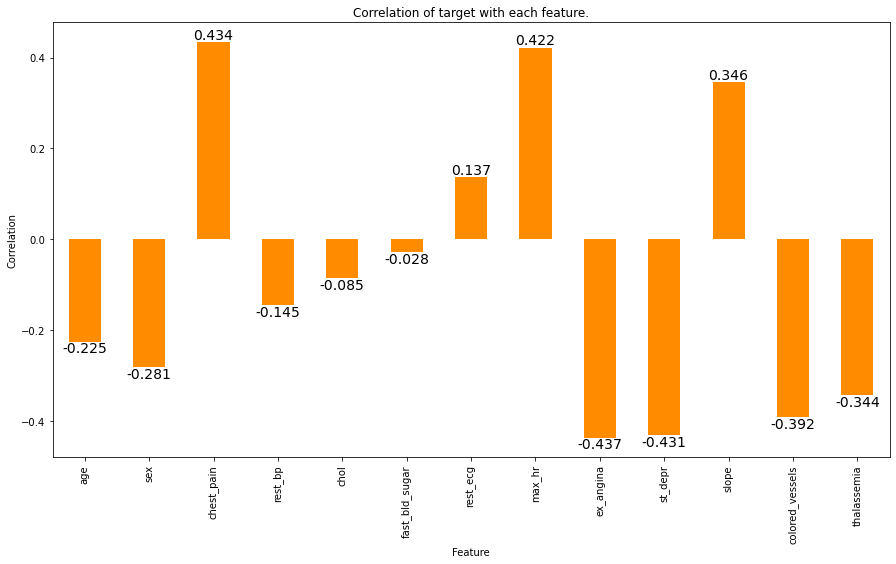

In [166]:
x = corr_matrix_pearson.loc[:, 'target'][:-1]

p = x.plot.bar(color='darkorange')
for rect in p.patches:
    x = rect.get_x()
    y = rect.get_y()
    h = rect.get_height()
    w = rect.get_width()
    if h>=0:
        p.annotate(f"{h:.3f}", (x+w/2, h), ha='center', va='bottom', **{'size':14})
    else:
        p.annotate(f"{h:.3f}", (x+w/2, h), ha='center', va='top', **{'size':14})
        
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of target with each feature.")
plt.show()

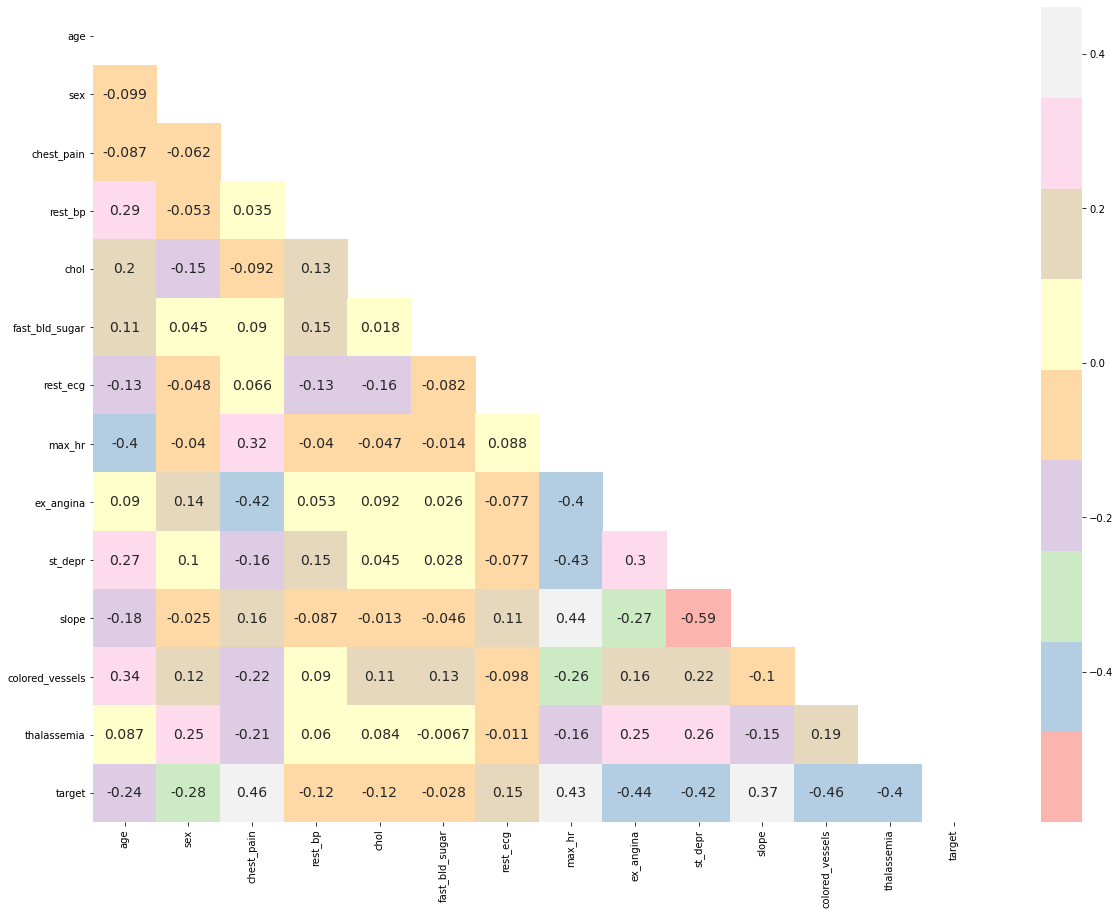

In [167]:
corr_matrix_spearman = heart_df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix_spearman, cmap='Pastel1', annot=True, 
            annot_kws={'size':14}, fmt='.2g', 
            mask=np.triu(corr_matrix_pearson))
plt.show()

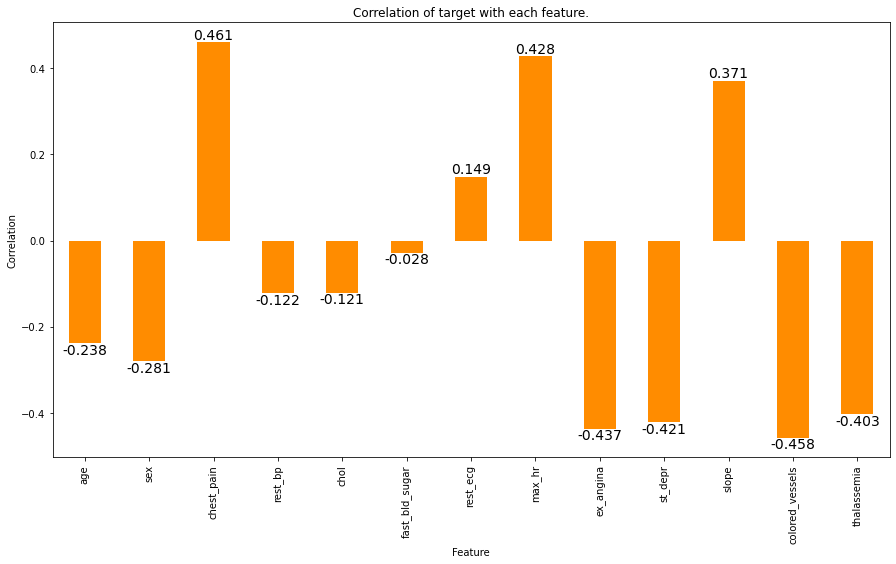

In [168]:
x = corr_matrix_spearman.loc[:, 'target'][:-1]

p = x.plot.bar(color='darkorange')
for rect in p.patches:
    x = rect.get_x()
    y = rect.get_y()
    h = rect.get_height()
    w = rect.get_width()
    if h>=0:
        p.annotate(f"{h:.3f}", (x+w/2, h), ha='center', va='bottom', **{'size':14})
    else:
        p.annotate(f"{h:.3f}", (x+w/2, h), ha='center', va='top', **{'size':14})
        
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of target with each feature.")
plt.show()